In [1]:
#!/usr/bin/python

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# import os
# import sys
import numpy as np

import time

from reservoir import Reservoir
import data

%load_ext autoreload
%autoreload 1
%aimport data
%aimport reservoir

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
total_pred_steps = 10
each_pred_step = 1
enc_depth = 6
n_res = 800
forget=100
b = Reservoir(n_res=n_res, input_scale=2, train_method='ridge', train_param=5,
              weights_type='complex gaussian', random_projection='simulation',
              activation_fun='binary', activation_param=1,encoding_method='naivebinary', 
              encoding_param=1, encoded_spatial_points=2**enc_depth, forget=forget, 
              total_pred_steps = total_pred_steps, each_pred_step = each_pred_step) 
# if DMD: encoded_spatial_points = 2**enc_depth
# if SLM: encoded_spatial_points = 1

In [26]:
input_data = data.mackey_glass(n_sequence=1, sequence_length=4000)
y = data.roll_and_concat(input_data, roll_num=each_pred_step)
input_data = input_data[:,:-10*each_pred_step,:]
y = y[:,:-10*each_pred_step,:]
b.fit(input_data, y)

Start of training...
Initialization finished. Elapsed time:
0.0014684200286865234
100%|██████████| 3990/3990 [00:01<00:00, 2078.14it/s]
Iterations finished. Elapsed time:
1.9565889835357666
Training finished. Elapsed time:
2.164130926132202
Training score:
0.9953270938910334


Reservoir(activation_fun='binary', activation_param=1, each_pred_step=1,
     encoded_spatial_points=64, encoding_method='naivebinary',
     encoding_param=1, forget=100, input_scale=2, n_res=800,
     opu_transform=None, random_projection='simulation',
     random_state=<mtrand.RandomState object at 0x7f7b501179d8>,
     res_scale=1, save=0, total_pred_steps=10, train_method='ridge',
     train_param=5, verbose=1, weights_type='complex gaussian')

In [52]:
input_data = data.mackey_glass(sequence_length=2000)
y = data.roll_and_concat(input_data, roll_num=total_pred_steps)
y = y.reshape(-1, y.shape[-1])
input_data = input_data[:,:-10*each_pred_step,:]
y = y[:-10*each_pred_step,:]
pred_output, valid_score = b.score(input_data, y)

Start of testing...
Initialization finished. Elapsed time:
0.0013566017150878906
100%|██████████| 1990/1990 [00:01<00:00, 1632.71it/s]
Iterations finished. Elapsed time:
1.2305779457092285
Initialization finished. Elapsed time:
0.0011219978332519531
100%|██████████| 1990/1990 [00:01<00:00, 1848.34it/s]
Iterations finished. Elapsed time:
1.1079692840576172
Initialization finished. Elapsed time:
0.001207113265991211
100%|██████████| 1990/1990 [00:01<00:00, 1856.86it/s]
Iterations finished. Elapsed time:
1.0928573608398438
Initialization finished. Elapsed time:
0.001211404800415039
100%|██████████| 1990/1990 [00:01<00:00, 1448.64it/s]
Iterations finished. Elapsed time:
1.3921029567718506
Initialization finished. Elapsed time:
0.0013475418090820312
100%|██████████| 1990/1990 [00:01<00:00, 1464.61it/s]
Iterations finished. Elapsed time:
1.375481128692627
Initialization finished. Elapsed time:
0.0013587474822998047
100%|██████████| 1990/1990 [00:01<00:00, 1605.97it/s]
Iterations finished. El

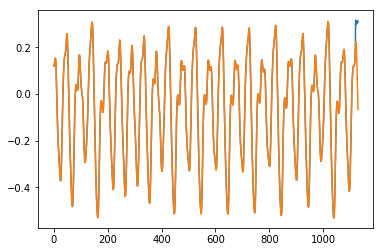

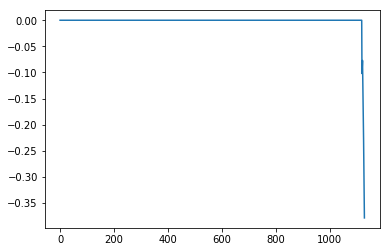

In [53]:
# n_input = round(pred_output.shape[0]/2)-100
n_input = 1120
all_data = np.concatenate((y[:n_input, 0], pred_output[n_input, :]))
plt.figure(1)
plt.plot(all_data)
plt.plot(y[0:n_input+total_pred_steps, 0])
plt.show()
plt.figure(2)
plt.plot(y[0:n_input+total_pred_steps, 0]-all_data)
# plt.plot(np.linspace(n_input,n_input,100),np.linspace(-0.6,0.6,100))
plt.show()

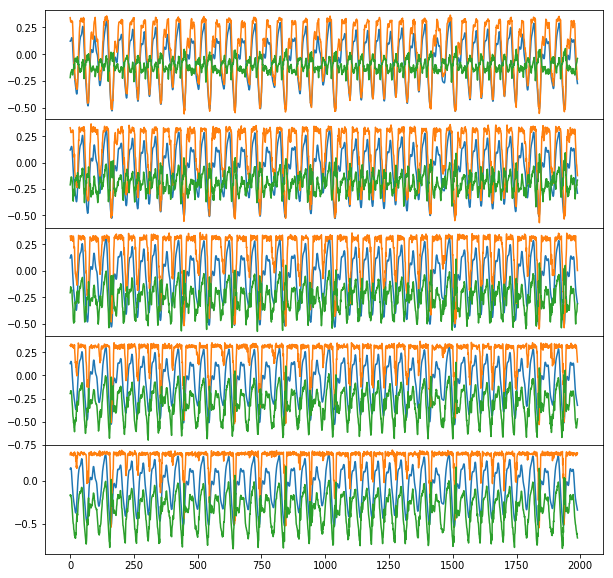

In [54]:
# maximum first 5 prediction steps are illustrated 
pred_step = min(5, y.shape[-1])
fig, axs = plt.subplots(pred_step, 1, sharex=True, figsize=(10,10))
fig.subplots_adjust(hspace=0)
for i in range(pred_step):
    axs[i].plot(y[:,i])
    axs[i].plot(pred_output[:,i])
    axs[i].plot(y[:,i]-pred_output[:,i])
plt.show()

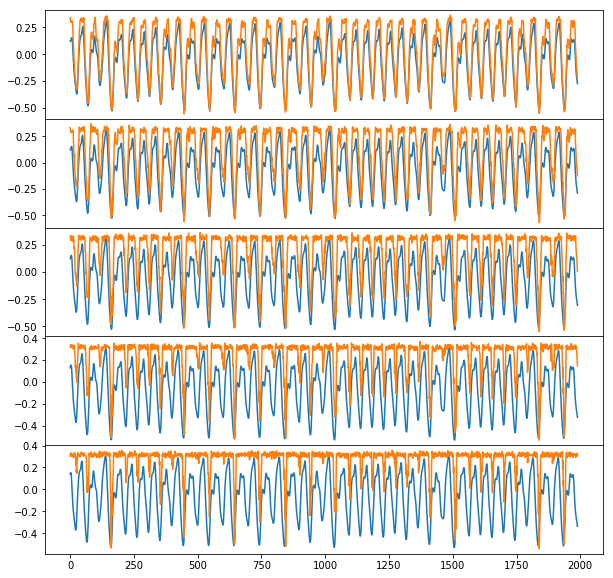

In [55]:
# maximum first 5 prediction steps are illustrated 
pred_step = min(5, y.shape[-1])
fig, axs = plt.subplots(pred_step, 1, sharex=True, figsize=(10,10))
fig.subplots_adjust(hspace=0)
for i in range(pred_step):
    axs[i].plot(y[:,i])
    axs[i].plot(pred_output[:,i])
plt.show()

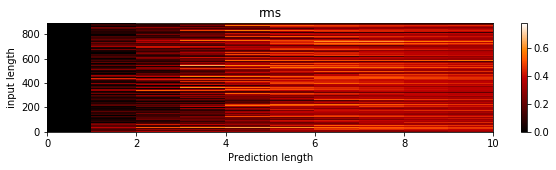

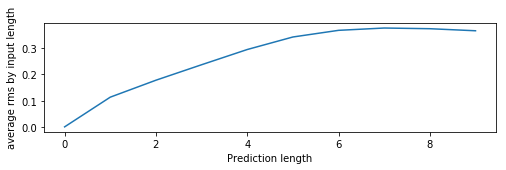

In [10]:
# rms for binary encoding

length_input = pred_output.shape[0]-total_pred_steps
rms = np.zeros((length_input, total_pred_steps))
for n_input in range(1, length_input):
    for n_pred in range(1, total_pred_steps):
        d1 = pred_output[n_input, :n_pred]
        d2 = y[n_input:n_input+n_pred, 0]
        rms[n_input, n_pred] = np.sqrt(1./(n_pred)*np.sum((d1 - d2)**2))

plt.figure(1,figsize=(10,2))
plt.title('rms')
plt.ylabel('input length')
plt.xlabel('Prediction length')
im=plt.pcolormesh(rms[:,:], cmap='gist_heat')
plt.colorbar(im)
plt.show;

plt.figure(2,figsize=(8.1,2))
plt.ylabel('average rms by input length')
plt.xlabel('Prediction length')
plt.plot(np.sum(rms[:,:], axis=0)/length_input)
plt.show;

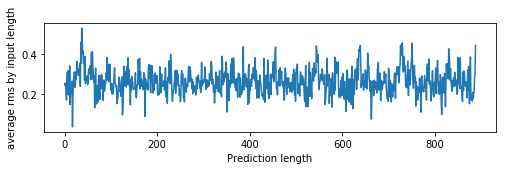

In [11]:
plt.figure(2,figsize=(8.1,2))
plt.ylabel('average rms by input length')
plt.xlabel('Prediction length')
plt.plot(np.sum(rms[1:,:], axis=1)/total_pred_steps)
plt.show;